In [1]:
# Machine Learning (K-Means Clustering)
# NPM  : 177006057
# Nama : Pian Rispian

In [2]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
# Import dataset heart-disease
link = "https://raw.githubusercontent.com/iyanrspian/kmeans-clustering/main/heart-disease.csv"
data = pd.read_csv(link)
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


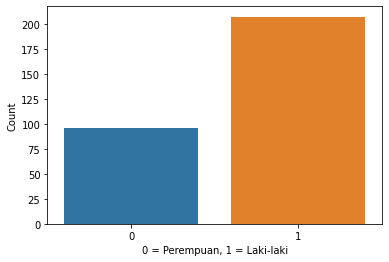

In [4]:
# Menampilkan banyaknya variabel "sex"
sns.countplot(x="sex", data=data)
plt.xlabel("0 = Perempuan, 1 = Laki-laki")
plt.ylabel("Count")
plt.show()

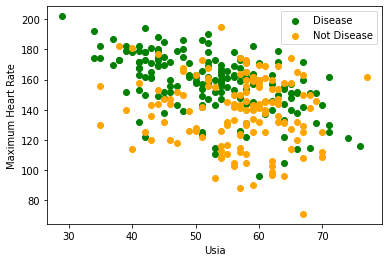

In [5]:
# Menampilkan potensi rasio perbandingan 'heart disease' berdasarkan usia
plt.scatter(x=data.age[data.target==1], y=data.thalach[(data.target==1)], c="green")
plt.scatter(x=data.age[data.target==0], y=data.thalach[(data.target==0)], c="orange")
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Usia")
plt.ylabel("Maximum Heart Rate")
plt.show()

In [6]:
# Menentukan variabel untuk clustering
X = data.iloc[:, [0, 4]].values

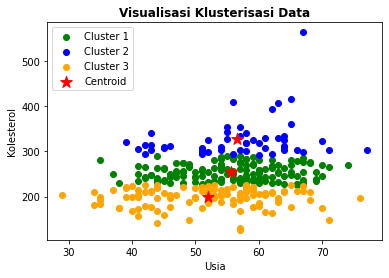

In [7]:
# Training the KMeans model dataset
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
Ymeans = kmeans.fit_predict(X)

# Visualisasi klusterisasi data
plt.scatter(X[Ymeans == 0,0], X[Ymeans == 0,1], c="green", label="Cluster 1")
plt.scatter(X[Ymeans == 1,0], X[Ymeans == 1,1], c="blue", label="Cluster 2")
plt.scatter(X[Ymeans == 2,0], X[Ymeans == 2,1], c="orange", label="Cluster 3")
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker="*", s=150, c="red", label="Centroid")
plt.title("Visualisasi Klusterisasi Data", fontweight="bold")
plt.xlabel("Usia")
plt.ylabel("Kolesterol")
plt.legend()
plt.show()

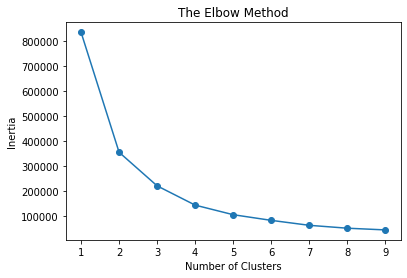

In [8]:
# Elbow method (untuk mengetahui nomor kluster yang lebih optimal)
sse = []
lst = list(range(1,10))
 
for i in lst:
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(X)
  sse.append(kmeans.inertia_)

# ..
plt.plot(lst, sse, '-o')
plt.title("The Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()